<a href="https://colab.research.google.com/github/hsiangwei0903/Fine-Grained-Object-Recognition/blob/dev%2Fravi%2Ftent/ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ravi Sangani**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install timm


Mounted at /content/drive
     |████████████████████████████████| 431 kB 8.4 MB/s 


In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/dogimages_streets

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/dogimages_streets


In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/2_18_22_dogPark

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/2_18_22_dogPark


In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/dogimages_insidehouse_ratterrier_chihuahua

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/dogimages_insidehouse_ratterrier_chihuahua


In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/Husky

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/Husky


## **running inference on single image**

In [ ]:
import timm
model = timm.create_model('resnet50', pretrained=True)
model.eval()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /root/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act2): ReLU(inplace=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act3): ReLU(inplace=True)
      (downsample): Sequen

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}


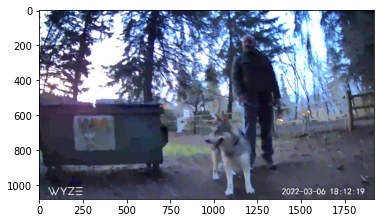

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


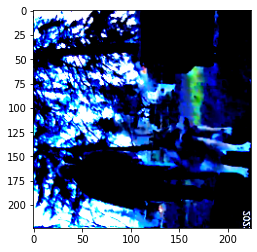

In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

# url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
# urllib.request.urlretrieve(url, filename)
# img = Image.open(filename).convert('RGB')
filename = "husky15.jpg"

img = Image.open(filename).convert('RGB')
read_image = mpimg.imread(filename)
implot = plt.imshow(read_image)
plt.show()

tensor = transform(img).unsqueeze(0) # transform and add batch dimension
plt.imshow(np.transpose(transform(img)))
plt.show()



In [ ]:
import torch
with torch.no_grad():
  out = model(tensor)
probabilities = torch.nn.functional.softmax(out[0], dim=0)
print(probabilities.shape)

torch.Size([1000])


In [ ]:
# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

picture_of = "Italian greyhound"
print([picture_of in categories])
# Print top categories per image
top10_prob, top10_catid = torch.topk(probabilities, 10)
for i in range(top10_prob.size(0)):
    print(categories[top10_catid[i]], top10_prob[i].item())

[True]
Eskimo dog 0.3180994689464569
dogsled 0.2632938027381897
Siberian husky 0.11084210127592087
malamute 0.06404875218868256
malinois 0.05373316630721092
Norwegian elkhound 0.043458446860313416
German shepherd 0.03943167254328728
amphibian 0.011049858294427395
kuvasz 0.004442008677870035
timber wolf 0.0037483705673366785


## **running inferences on all ratterrier/chihuahua images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/dogimages_insidehouse_ratterrier_chihuahua

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/dogimages_insidehouse_ratterrier_chihuahua


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "chihuahua"
key_words = ["chihuahua", "terrier"]
softmax_accuracy_threshold = 0.10
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 3)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("ResNet50 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())



{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}
chihuahua is a category in ImageNet?: True
italian greyhound 0.34889450669288635
toy terrier 0.20315060019493103
french bulldog 0.04681731387972832
ratterrier_chihuahua_3.jpg had its actual category in the top 3 predictions with softmax > 0.1


staffordshire bullterrier 0.5327358841896057
italian greyhound 0.13836967945098877
american staffordshire terrier 0.07276316732168198
ratterrier_chihuahua_1.jpg had its actual category in the top 3 predictions with softmax > 0.1


staffordshire bullterrier 0.5111846923828125
american staffordshire terrier 0.07812175899744034
carton 0.03808128461241722
ratterrier_chihuahua_2.jpg had its actual category in the top 3 predictions with softmax > 0.1


boston bull 0.8089540004730225
carton 0.032481782138347626
toy terrier 0.021234598010778427
ratterrier_chihuahua_4.jpg did not have its actual category in the top 3 pr

## **running inferences on all husky images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/Husky

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/Husky


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "Siberian husky"
key_words = ["husky"]
softmax_accuracy_threshold = 0.10
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 3)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("ResNet50 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())



{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}
Siberian husky is a category in ImageNet?: False


malamute 0.23173052072525024
dogsled 0.17047303915023804
eskimo dog 0.12214124202728271
husky0.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


malamute 0.23173052072525024
dogsled 0.17047303915023804
eskimo dog 0.12214124202728271
husky1.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


dogsled 0.8694623708724976
tank 0.01821323297917843
eskimo dog 0.014253273606300354
husky2.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


dogsled 0.5473541617393494
eskimo dog 0.1187988668680191
malamute 0.10019843280315399
husky3.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


tank 0.1852266788482666
oxcart 0.08922618627548218
ox 0.06235906854271889
husky4.jpg did not have its actu

## **running inferences on all labrador images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/dogimages_streets/labrador

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/dogimages_streets/labrador


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "labrador retriever"
key_words = ["labrador"]
softmax_accuracy_threshold = 0.10
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 3)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("ResNet50 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())



{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}
labrador retriever is a category in ImageNet?: True


newfoundland 0.2215610295534134
tibetan mastiff 0.1932968944311142
groenendael 0.12496478110551834
D03F27343A40_1645494029036.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


standard poodle 0.2780640125274658
bouvier des flandres 0.2352771759033203
newfoundland 0.06034185737371445
D03F27343A40_1645494032247.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


curly-coated retriever 0.8694446682929993
chesapeake bay retriever 0.05847018584609032
labrador retriever 0.03733670711517334
D03F27343A40_1645494034089.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


great dane 0.26108381152153015
staffordshire bullterrier 0.1712992638349533
german short-haired pointer 0.06676191091537476
D03F27343A40_164549405

## **running inferences on all greyhound images**

In [ ]:
cd /content/drive/My Drive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/dogimages_streets/greyhound

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/dogimages_streets/greyhound


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "italian greyhound"
key_words = ["greyhound"]
softmax_accuracy_threshold = 0.10
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 3)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("ResNet50 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())


{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}
italian greyhound is a category in ImageNet?: True


great dane 0.7723042964935303
weimaraner 0.1052977442741394
english setter 0.02932761050760746
D03F27343A40_1645494717371.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


great dane 0.9708408713340759
mexican hairless 0.00767012732103467
weimaraner 0.003013819456100464
D03F27343A40_1645494721221.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


oxcart 0.7996690273284912
great dane 0.10222268849611282
mexican hairless 0.03292074427008629
D03F27343A40_1645494696537.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


weimaraner 0.5696529746055603
english setter 0.2709091305732727
great dane 0.08166692405939102
D03F27343A40_1645494702614.jpg did not have its actual category in the top 3 predictions with sof

## **running inferences on all boxer german sheperd mix images**

In [ ]:
cd /content/drive/MyDrive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/Boxer_German_Shepherd_Mix

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/Boxer_German_Shepherd_Mix


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "german sheperd"
key_words = ["german sheperd"]
softmax_accuracy_threshold = 0.10
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 3)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("ResNet50 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}
german sheperd is a category in ImageNet?: False


newfoundland 0.3438052833080292
saint bernard 0.17672507464885712
kuvasz 0.06373317539691925
boxer_gerShepherd0.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


solar dish 0.08317180722951889
scottish deerhound 0.07597418129444122
ski 0.06761015951633453
boxer_gerShepherd1.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


swing 0.8815934658050537
yurt 0.014790504239499569
dogsled 0.009022885002195835
boxer_gerShepherd2.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


solar dish 0.40032052993774414
ashcan 0.07584168016910553
swing 0.07111677527427673
boxer_gerShepherd3.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


ski 0.3194238841533661
snowmobile 0.08840105682611465

## **running inferences on all malamute images**

In [ ]:
cd /content/drive/MyDrive/UW/2021-22_Senior/Capstone/ENGINE: Wyze/Images/2_18_22_dogPark/malamute

/content/drive/.shortcut-targets-by-id/1beXLuTyfFnOo3t19p65wHXF-qaxghvjI/ENGINE: Wyze/Images/2_18_22_dogPark/malamute


In [ ]:
import urllib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import os
from PIL import Image
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform

config = resolve_data_config({}, model=model)
transform = create_transform(**config)
print(config)

accurate_prediction_counter = 0
total_number_of_images = 0

# Get imagenet class mappings
url, filename = ("https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt", "imagenet_classes.txt")
urllib.request.urlretrieve(url, filename) 
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
categories = [category.lower() for category in categories]
picture_of = "malamute"
key_words = ["malamute"]
softmax_accuracy_threshold = 0.10
contains = (picture_of in categories)
print(picture_of + " is a category in ImageNet?: " + str(contains))
print("\n")

for filename in os.listdir("."):
  if filename.endswith("jpg"):
    total_number_of_images += 1
    img = Image.open(filename).convert('RGB')
    tensor = transform(img).unsqueeze(0) # transform and add batch dimension
    with torch.no_grad():
      out = model(tensor)
    probabilities = torch.nn.functional.softmax(out[0], dim=0)
    accurate_prediction = False
    # Print top categories per image
    top3_prob, top3_catid = torch.topk(probabilities, 3)
    for i in range(top3_prob.size(0)):
      print(categories[top3_catid[i]], top3_prob[i].item())
      category = categories[top3_catid[i]]
      for key_word in key_words:
        if (key_word in category) and (top3_prob[i].item() > softmax_accuracy_threshold):
          accurate_prediction = True
    if (accurate_prediction):
      print(filename + " had its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
      accurate_prediction_counter += 1
    else:
      print(filename + " did not have its actual category in the top 3 predictions with softmax > " + str(softmax_accuracy_threshold))
      print("\n")
accuracy = (accurate_prediction_counter / total_number_of_images) * 100
print("ResNet50 had a " + str(accuracy) + "% accuracy on images in " + os.getcwd())

{'input_size': (3, 224, 224), 'interpolation': 'bicubic', 'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225), 'crop_pct': 0.95}
malamute is a category in ImageNet?: True


lakeside 0.5767626762390137
eskimo dog 0.12431168556213379
siberian husky 0.11335254460573196
malamute_2.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


siberian husky 0.38937926292419434
eskimo dog 0.21898458898067474
malamute 0.11255262047052383
malamute_3.jpg had its actual category in the top 3 predictions with softmax > 0.1


siberian husky 0.782913863658905
eskimo dog 0.15822479128837585
malamute 0.018296130001544952
malamute_4.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


lakeside 0.5800926089286804
eskimo dog 0.16477999091148376
indri 0.06790685653686523
malamute_5.jpg did not have its actual category in the top 3 predictions with softmax > 0.1


kuvasz 0.2764964997768402
siberian husky 0.056242842227220535
labrador retriever 0.0

### notes

[link text](https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F08%2F10%2Falaskan-malamute-vs-siberian-husky-infographic.png
)

interesting results, the siberian husky is almost identical to malamute
